## Problem: 545. Boundary of Binary Tree

https://leetcode.com/problems/boundary-of-binary-tree/

Given a binary tree, return the values of its boundary in anti-clockwise direction starting from root. Boundary includes left boundary, leaves, and right boundary in order without duplicate nodes.  (The values of the nodes may still be duplicates.)

Left boundary is defined as the path from root to the left-most node. Right boundary is defined as the path from root to the right-most node. If the root doesn't have left subtree or right subtree, then the root itself is left boundary or right boundary. Note this definition only applies to the input binary tree, and not applies to any subtrees.

The left-most node is defined as a leaf node you could reach when you always firstly travel to the left subtree if exists. If not, travel to the right subtree. Repeat until you reach a leaf node.

The right-most node is also defined by the same way with left and right exchanged.

Example:

Input:
  
  1
  
   \
   
    2
    
     / \
   
    3   4


Ouput:

[1, 3, 4, 2]

Explanation:

The root doesn't have left subtree, so the root itself is left boundary.
The leaves are node 3 and 4.
The right boundary are node 1,2,4. Note the anti-clockwise direction means you should output reversed right boundary.
So order them in anti-clockwise without duplicates and we have [1,3,4,2].

Example2:

Input:

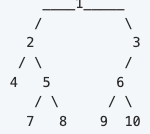

  


Ouput:

[1,2,4,7,8,9,10,6,3]

Explanation:

The left boundary are node 1,2,4. (4 is the left-most node according to definition)
The leaves are node 4,7,8,9,10.
The right boundary are node 1,3,6,10. (10 is the right-most node).
So order them in anti-clockwise without duplicate nodes we have [1,2,4,7,8,9,10,6,3].

In [3]:
# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

def boundaryOfBinaryTree(root):
    res = []
    if not root:
        return res
    if not isLeaf(root):
        res.append(root.val)
        
    # left nodes
    left = root.left
    while left:
        if not isLeaf(left):
            res.append(left.val)
        if left.left:
            left = left.left
        else:
            left = left.right
    # leaves
    addLeaves(root,res)
    
    # Right Nodes
    
    stack = []
    right = root.right
    while right:
        if not isLeaf(right):
            stack.append(right.val)
        if right.right:
            right = right.right
        else:
            right = right.left
    
    while len(stack):
        res.append(stack.pop())
    return res

def isLeaf(root):
    return root and root.left is None and root.right is None

def addLeaves(root, res):
    if isLeaf(root):
        res.append(root.val)
        return
    if root.left:
        addLeaves(root.left, res)
    if root.right:
        addLeaves(root.right, res)
        